# Ch1

In [1]:
# 第 1 章のプログラムは，事前に下記が実行されていることを仮定する。
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use("seaborn-ticks")

## 1

In [2]:
B = np.random.randn(5,5)
A = B.T@B

In [3]:
for i in range(5):
    x = np.random.randn(5).reshape(-1,)
    print(x.T@A@x)

6.44550819001953
2.8611258593266715
26.50609897398167
39.920400454824595
10.068269950769912


2次形式の全ての値は非負となっている

## 2

In [4]:
def k(x, y, lam):
    return D(np.abs((x - y) / lam))

<ipython-input-5-07b6850729b4>:20: RuntimeWarning: invalid value encountered in double_scalars
  return S / T


Text(0.5, 1.0, 'Nadaraya-Watson Estimator')

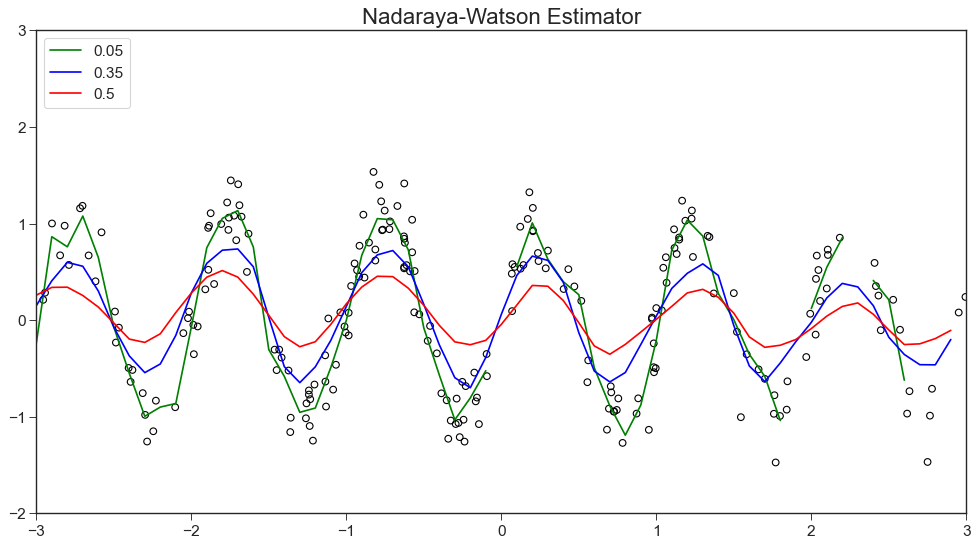

In [5]:
n = 250
x = 2 * np.random.normal(size=n)
y = np.sin(2 * np.pi * x) + np.random.normal(size=n) / 4  # データ生成


def D(t):          # 関数定義 D
    return np.maximum(0.75 * (1 - t**2), 0)


def k(x, y, lam):  # 関数定義 K
    return D(np.abs((x - y) / lam))


def f(z, lam):     # 関数定義 f
    S = 0
    T = 0
    for i in range(n):
        S = S + k(x[i], z, lam) * y[i]
        T = T + k(x[i], z, lam)
    return S / T

plt.figure(num=1, figsize=(15, 8), dpi=80)
plt.xlim(-3, 3)
plt.ylim(-2, 3)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.scatter(x, y, facecolors="none", edgecolors="k", marker="o")

xx = np.arange(-3, 3, 0.1)
yy = [[] for _ in range(3)]
lam = [0.05, 0.35, 0.50]
color = ["g", "b", "r"]
for i in range(3):
    for zz in xx:
        yy[i].append(f(zz, lam[i]))
    plt.plot(xx, yy[i], c=color[i], label=lam[i])

plt.legend(loc="upper left", frameon=True, prop={"size": 14})
plt.title("Nadaraya-Watson Estimator", fontsize=20)

## 8

In [6]:
def K(x, y, sigma2):
    return np.exp(-np.linalg.norm(x - y)**2 / 2 / sigma2)


def F(z, sigma2):  # 関数定義 f
    S = 0
    T = 0
    for i in range(n):
        S = S + K(x[i], z, sigma2) * y[i]
        T = T + K(x[i], z, sigma2)
    return S / T

In [7]:
n = 100
x = 2 * np.random.normal(size=n)
y = np.sin(2 * np.pi * x) + np.random.normal(size=n) / 4  # データ生成

# 最適な lambda の値の計算
m = int(n / 10)
sigma2_seq = np.arange(0.001, 0.01, 0.001)
SS_min = np.inf
for sigma2 in sigma2_seq:
    SS = 0
    for k in range(10):
        test = range(k*m, (k+1)*m)
        train = [x for x in range(n) if x not in test]
        for j in test:
            u, v = 0, 0
            for i in train:
                kk = K(x[i], x[j], sigma2)
                u = u + kk * y[i]
                v = v + kk
            if v != 0:
                z = u / v
                SS = SS + (y[j] - z)**2
    if SS < SS_min:
        SS_min = SS
        sigma2_best = sigma2
print("Best sigma2 =", sigma2_best)

Best sigma2 = 0.003


Text(0.5, 1.0, 'Nadaraya-Watson Estimator')

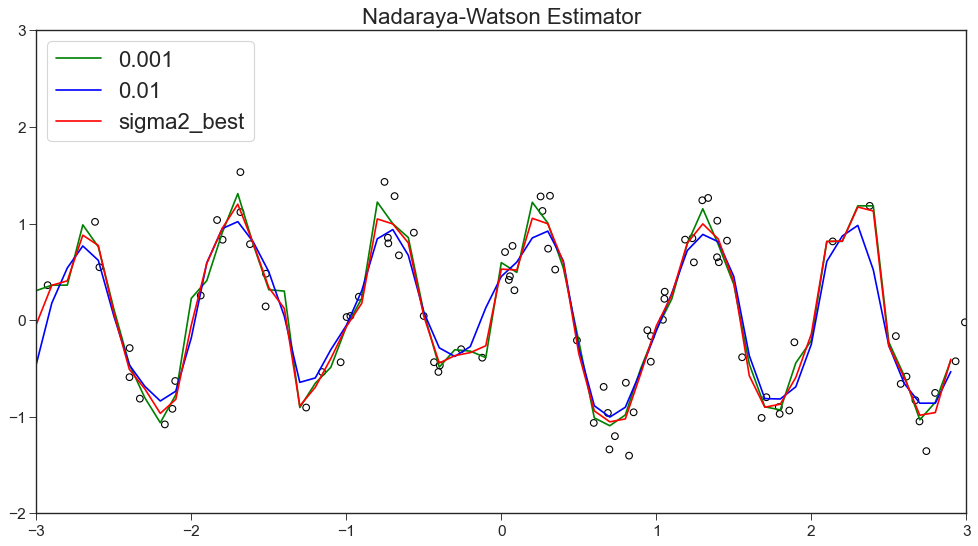

In [8]:
plt.figure(num=1, figsize=(15, 8), dpi=80)
plt.scatter(x, y, facecolors="none", edgecolors="k", marker="o")
plt.xlim(-3, 3)
plt.ylim(-2, 3)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

xx = np.arange(-3, 3, 0.1)
yy = [[] for _ in range(3)]
sigma2 = [0.001, 0.01, sigma2_best]
labels = [0.001, 0.01, "sigma2_best"]
color = ["g", "b", "r"]

for i in range(3):
    for zz in xx:
        yy[i].append(F(zz, sigma2[i]))
    plt.plot(xx, yy[i], c=color[i], label=labels[i])
plt.legend(loc="upper left", frameon=True, prop={"size": 20})
plt.title("Nadaraya-Watson Estimator", fontsize=20)

## 12

In [9]:
def string_kernel(x, y):
    m, n = len(x), len(y)
    S = 0
    for i in range(m):
        for j in range(i, m):
            for k in range(n):
                if x[(i-1):j] == y[(k-1):(k+j-i)]:
                    S = S + 1
    return S

In [10]:
C = ["a", "b", "c"]
m = 10
w = np.random.choice(C, m, replace=True)
x = ""
for i in range(m):
    x = x + w[i]
n = 12
w = np.random.choice(C, n, replace=True)
y = ""
for i in range(n):
    y = y + w[i]

In [11]:
x,y

('baacccbbac', 'babbaccacbba')

In [12]:
string_kernel(x,y)

61

## 15

In [13]:
def k(s, p):
    return prob(s, p) / len(node)


def prob(s, p):
    if len(node[s[0]]) == 0:
        return 0
    if len(s) == 1:
        return p
    m = len(s)
    S = (1 - p) / len(node[s[0]]) * prob(s[1:m], p)
    return S

In [14]:
node = [[] for _ in range(5)]
node[0] = [1, 3]
node[1] = [3]
node[2] = [0, 4]
node[3] = [2]
node[4] = [2]
k([0, 3, 2, 4, 2], 1 / 3)

0.0032921810699588485

In [15]:
2**2 / (5*3**5)

0.0032921810699588477

この時，パスとして存在し得ないものを関数kの引数としても値を返してしまう  
例として以下のようなあり得ないウォークを指定しても  
1 -> 3 -> 5

In [16]:
k([0,2,4], 1/3)

0.0074074074074074086

非ゼロの値を返してしまう．  
解決策としては隣接リストnodeを参照して次のノードへの遷移がありうるものかどうかの判定を行う必要がある．